# Logistic Regression

Logistic Regression is a statistical method used for binary classification tasks, which predicts the probability that a given input belongs to a certain class (labelled as 1) versus another class (labelled as 0). It's one of the simplest and most widely used classification algorithms, especially suited for problems where you have a linear decision boundary between the two classes.  Logistic regression is closely related to linear regression, and since you've already learned about that, we'll start there.

## From Linear Regression to Logistic Regression

To understand the relationship between Linear Regression and Logistic Regression, let's start by revisiting the core concept of Linear Regression and then see how Logistic Regression builds upon it.

### Linear Regression Recap

In Linear Regression, we model the relationship between input features and a continuous output variable using a linear equation:

$$ y = w_1x_1 + w_2x_2 + ... + w_nx_n + b $$

Where:
- y is the predicted value
- $x_1, x_2, ..., x_n$  are the feature values
- $w_1, w_2, ..., w_n$ are the weights for each feature
- $w_0$ is the bias term

The goal is to find the best values for $w_0, w_1, w_2, ..., w_n$ that minimize the difference between predicted and actual y values across all data points.

### The Transition to Logistic Regression

Now, imagine we want to use a similar approach for a binary classification problem, where the output is either 0 or 1 (e.g., spam or not spam). We could try to use Linear Regression and set a threshold:

- If $y \ge 0.5$, classify as 1
- If $y \lt 0.5$, classify as 0

However, this approach has several issues:
1. The output of Linear Regression isn't bounded between 0 and 1.
2. It assumes a linear relationship between features and the probability of the positive class, which isn't always appropriate for classification.

This is where Logistic Regression comes in.

### The Logistic Function

Logistic Regression turns linear regression into a probability by applying the _logistic function_ to the linear equation. Here's how it works:

1. Start with the same linear equation as in Linear Regression:
   
$$ z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n $$

2. Apply the logistic (sigmoid) function to this linear combination:
   
   $$p = \frac{1}{1 + e^{-z}}$$

Where:
- $z$ is the linear combination of features and weights (just like in Linear Regression)
- $p$ is the predicted probability of the positive class (bounded between 0 and 1)

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>


**The Logistic Function**

The general form of the logistic function is:

$$ p(Y=1) = \frac{1}{1 + e^{-(\alpha + \beta X)}} $$

Here, $p(Y=1)$ is the probability that the target variable belongs to class 1. Note that $\beta$ and $X$ should be considered to be vectors in the multidimensional case.  So, the fully expanded form of the logistic function is then:

$$ p(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}} $$

1. **Effect of Modifying Alpha ($\alpha$)**:
   - The first graph (below) illustrates how changing the intercept term $\alpha$ shifts the logistic curve along the x-axis.
   - Increasing $\alpha$ shifts the curve to the right, indicating that higher x values are needed to achieve the same probability.
   - Decreasing $\alpha$ shifts the curve to the left, lowering the x value threshold for achieving higher probabilities.

2. **Effect of Modifying Beta ($\beta$)**:
   - The second graph (below) shows the effect of changing the slope coefficient $\beta$ on the steepness of the logistic curve.
   - A higher $\beta$ value makes the curve steeper, indicating a more sensitive response to changes in x.
   - A lower $\beta$ value results in a flatter curve, indicating a less sensitive response to x changes.

The logistic function "squashes" linear combinations of inputs into the [0, 1] range, enabling the calculation of probabilities. Adjusting $\alpha$ and $\beta$ can fine-tune the model's response to different feature values.

</div>


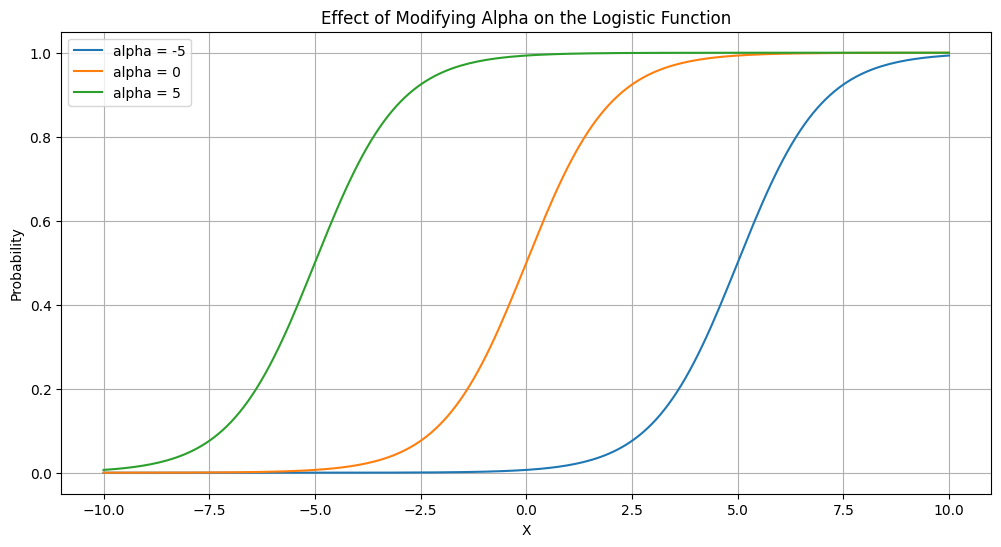

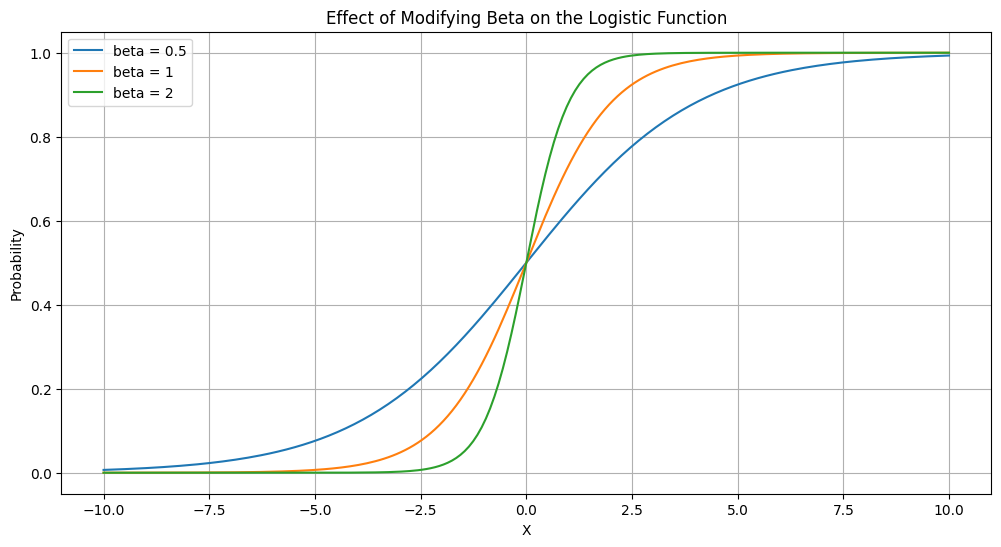

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(x, alpha, beta):
    """
    Logistic function to calculate probabilities.
    x: input feature
    alpha: intercept term
    beta: coefficient term
    """
    return 1 / (1 + np.exp(-(alpha + beta*x)))

# Graph 1: Modifying alpha (intercept term)
x = np.linspace(-10, 10, 200)  # Generate 200 points between -10 and 10
alphas = [-5, 0, 5]  # Different values of alpha to shift the curve

plt.figure(figsize=(12, 6))
for alpha in alphas:
    plt.plot(x, logistic_function(x, alpha, 1), label=f'alpha = {alpha}')

plt.title('Effect of Modifying Alpha on the Logistic Function')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

# Graph 2: Modifying beta (coefficient term)
betas = [0.5, 1, 2]  # Different values of beta to modify the slope

plt.figure(figsize=(12, 6))
for beta in betas:
    plt.plot(x, logistic_function(x, 0, beta), label=f'beta = {beta}')

plt.title('Effect of Modifying Beta on the Logistic Function')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

The logistic (sigmoid) function serves several crucial purposes:

1. **Bounding the output**: It transforms the unbounded linear combination into a value between 0 and 1, which can be interpreted as a probability.

2. **Non-linearity**: It introduces a non-linear relationship between the features and the probability, which is often more appropriate for classification tasks.

3. **Smooth transition**: It provides a smooth, S-shaped curve that transitions gradually from 0 to 1, allowing for more nuanced probability estimates.





### The "Line" in Logistic Regression

Both linear regression and logistic regression calculate the equation of a line (or hyperplane in higher dimensions). In Linear Regression, this line represents the predicted values directly. In Logistic Regression, the "line" plays a different role:

1. **Decision Boundary**: The line where $z = 0$ (or equivalently, where $p = 0.5$) serves as the decision boundary. Points on one side are classified as 0, and points on the other side as 1.

2. **Probability Contours**: The "line" in the feature space represents contours of constant probability. Moving perpendicular to this line changes the predicted probability most rapidly.

Here's a visualization to illustrate this concept:


In [ ]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_classes=2, random_state=42)

# Fit logistic regression
clf = LogisticRegression().fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict probabilities for each point in the mesh
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary and Probability Contours')
plt.colorbar(label='Probability of Class 1')
plt.show()



In this plot:
- The background color represents the predicted probability of Class 1.
- The white line in the middle is the decision boundary (where p = 0.5).
- The gradual color change shows how the probability changes as you move away from the decision boundary.

### Differences between Linear Regression and Logistic Regression

1. **Output Interpretation**: In Linear Regression, the output is a continuous value. In Logistic Regression (which is really a classifier), the output is interpreted as the probability of belonging to the positive class.

2. **Loss Function**: Linear Regression typically uses Mean Squared Error as the loss function. Logistic Regression uses Log Loss (Binary Cross-Entropy; see below).

3. **Assumptions**: Linear Regression assumes a linear relationship between features and the target variable. Logistic Regression assumes a linear relationship between features and the log-odds of the positive class.

4. **Optimization**: While both can use gradient descent for optimization, the specific update rules differ due to the different loss functions.

### Summary

Logistic Regression can be seen as an extension of Linear Regression for binary classification problems. It uses the same idea of finding optimal weights for a linear combination of features, but applies the sigmoid function to transform this into probabilities. This allows for effective binary classification while providing probability estimates, making it a powerful and interpretable model for many real-world problems.

## The Logistic Regression Algorithm



As with our linear regression algorithm, we can use any algorithm that minimizes a loss function, like gradient descent. However, unlike linear regression, we cannot compute mean-squared error, because the "distance from the line" is no longer meaningful in the same way. 

For one class class, we instead use a loss called **binary cross-entropy**, also known as log loss. It measures the performance of a classification model whose output is a probability value between 0 and 1. The loss increases as the predicted probability diverges from the actual label. For a dataset with $ N $ observations, the loss function can be written as:

$$ L(\beta) = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p(x_i)) + (1 - y_i) \log(1 - p(x_i))] $$

- $ y_i $ is the actual label of the $i^{th}$ observation, which can be 0 or 1.
- $ p(x_i) $ is the predicted probability that the $i^{th}$ observation belongs to class 1.
- The sum runs over all $N$ observations in the dataset.

The goal of logistic regression is to find the set of coefficients $ \beta $ that minimize this loss function.



Just as with our implementation of linear regression, logistic regression proceeds in the following manner.

1. **Initialization**: The model coefficients ($ \beta $) are usually initialized to 0 or a small random number.
2. **Model Training**: During training, logistic regression uses an optimization algorithm (like gradient descent) to minimize the loss function. This involves making predictions using the current coefficients, calculating the error by comparing the predicted probabilities with the actual class labels, and then adjusting the coefficients based on this error.
3. **Updating Coefficients**: The coefficients are updated in a direction that reduces the loss. The learning rate determines the size of the step taken in this direction at each iteration.
4. **Convergence**: The process continues iteratively until the model converges, meaning the reduction in the loss function becomes negligible with further iterations, or until a specified number of iterations is reached.



## Logistic Regression on the Iris Data

The following example illustrates how logistic regression works with two classes from the Iris dataset.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

In [ ]:
print(iris.DESCR)  # extra code – it's a bit too long

In [ ]:
iris.data.head(3)

In [ ]:
iris.target.head(3)  # note that the instances are not shuffled

In [ ]:
iris.target_names

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

In [ ]:
decision_boundary

In [ ]:
log_reg.predict([[1.7], [1.5]])

In [ ]:
# Illustrates the impact of moving the decision boundary

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

## Handling multiple classes

Logistic Regression is inherently a binary classifier, designed to predict the probability of an instance belonging to one of two classes. However, it can be extended to handle multiclass classification problems through techniques like **One-vs-Rest (OvR)** and **Multinomial Logistic Regression** (also calls **softmax regression**). By default, LogisticRegression in sklearn uses Softmax regression.

### One-vs-Rest (OvR)
One-vs-Rest, also known as One-vs-All (OvA), is a strategy for using binary classification algorithms, like Logistic Regression, for multiclass classification tasks. The basic idea is to train a separate classifier for each class, where each classifier predicts whether an instance belongs to its 'own' class versus 'all other' classes.

- **How It Works**:
  - If there are $N$ classes, $N$ separate Logistic Regression models are trained.
  - Each model is trained to distinguish instances of its own class from instances of all other classes.
  - For a given instance, all $N$ models make a prediction, and the model with the highest predicted probability assigns its class to the instance.

### Multinomial Logistic Regression
Multinomial Logistic Regression, also known as Softmax Regression, extends Logistic Regression to handle multiple classes directly, without having to train multiple binary classifiers.

- **How It Works**:
  - Instead of using the sigmoid function (which outputs probabilities for two classes), the softmax function is used to compute the probabilities of the multiple classes.
  - The softmax function converts the scores (logits) for each class into probabilities by taking the exponential of each score and then normalizing these exponentials by dividing by their sum. This ensures that the probabilities of all classes sum up to 1.
  - The model is trained to maximize the likelihood of the true class by adjusting the weights using a generalization of the logistic loss function, suitable for multiple classes.

### The Softmax Function
For a given instance $x$, the probability that it belongs to class $k$ out of $K$ classes is given by:

$$ P(y=k | x) = \frac{e^{(x^T \beta_k)}}{\sum_{j=1}^{K} e^{(x^T \beta_j)}} $$

- $x^T \beta_k$ is the score (logit) of class $k$ for instance $x$.
- $e^{(x^T \beta_k)}$ is the exponential of the score, ensuring non-negative values.
- The denominator is the sum of exponentials of all class scores, normalizing the probabilities.

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>

### Connecting the Logistic Function to Softmax 

Although they look somewhat different, the logistic function and softmax are in fact equivalent in the binary case.

#### Logistic Function

The logistic function, also known as the sigmoid function, is defined as:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

For binary logistic regression, if we have a single input $z$ (called the the logit), the probability of the positive class is given by $\sigma(z)$, and the probability of the negative class is $1 - \sigma(z)$.

#### Softmax Function

The softmax function for $K$ classes is defined as:

$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$

where $z_i$ is the logit for class $i$.

#### Softmax for Binary Classification

In the case of binary classification (K=2), let's call the two logits $z_1$ and $z_2$. The softmax probabilities would be:

$$p_1 = \frac{e^{z_1}}{e^{z_1} + e^{z_2}}$$

$$p_2 = \frac{e^{z_2}}{e^{z_1} + e^{z_2}}$$

#### The Relationship

In binary classification with softmax, we can represent the log-odds of class 1 versus class 2 as $z = z_1 - z_2$. This is because only the difference between the logits matters for the final probabilities.

Let's express $p_1$ in terms of this difference $z$:

$$p_1 = \frac{e^{z_1}}{e^{z_1} + e^{z_2}} = \frac{e^{z_1}}{e^{z_1} + e^{z_2}} \cdot \frac{e^{-z_2}}{e^{-z_2}} = \frac{e^{z_1-z_2}}{e^{z_1-z_2} + 1} = \frac{e^z}{e^z + 1}$$

This last expression is exactly the logistic function $\sigma(z)$!

$$p_1 = \frac{e^z}{e^z + 1} = \frac{1}{1 + e^{-z}} = \sigma(z)$$

And consequently:

$$p_2 = 1 - p_1 = 1 - \sigma(z) = \sigma(-z)$$

Thus:

1. Softmax with two classes is mathematically equivalent to the logistic function.
2. The input to the logistic function ($z$) represents the log-odds or the difference between the two logits in the softmax formulation.

This relationship explains why in practice:

- For binary classification, we often use the terms "logistic regression" and "softmax regression" interchangeably.
- Libraries might use softmax even for binary problems, as it generalizes to multi-class problems seamlessly.
- The choice between implementing logistic function or softmax for binary problems often comes down to code simplicity and consistency, rather than mathematical necessity.

</div>




### Loss Function for Multinomial Logistic Regression
The loss function used is the _cross-entropy loss_, generalized for multiple classes. It measures the difference between the predicted probabilities and the actual class labels across all classes and instances.

For multi-class problems with $K$ classes, the cross-entropy loss for a single sample is:

$$L = -\sum_{i=1}^K y_i \log(p_i)$$

where:
- $K$ is the number of classes
- $y_i$ is the true probability for class $i$ (usually 0 or 1 for one-hot encoded labels)
- $p_i$ is the predicted probability for class $i$

For a dataset with $N$ samples, the average cross-entropy loss is:

$$L = -\frac{1}{N} \sum_{j=1}^N \sum_{i=1}^K y_{ij} \log(p_{ij})$$

where $y_{ij}$ and $p_{ij}$ are the true and predicted probabilities for class $i$ of sample $j$, respectively.

Cross-entropy loss measures the dissimilarity between the predicted probability distribution and the true distribution. A lower cross-entropy indicates better performance, with the loss approaching zero as predictions become more accurate and confident.


### **Softmax Regression in sklearn**

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Note that 'C' is a 'regularization' parameter which helps to prevent overfitting.
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]]).round(2)

In [ ]:
# This illustrates the behavior of the softmax function.  Note  that the decision boundary is constructed from a set of line segments.
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()